# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect2. Linear Regression

In [15]:
from images import bigpycraft_ai as bpc
from IPython.display import Image 

### Hypothesis and cost function

$$H(x) = Wx+b$$
$$cost(W,b) = \frac{1}{m} \sum^m_{i=1}(H(x^{(i)}-y^{(i)})^2$$

### TensorFlow Mechanics
1. Build graph using TF operations
2. Run graph and get results
3. Update graph and get results


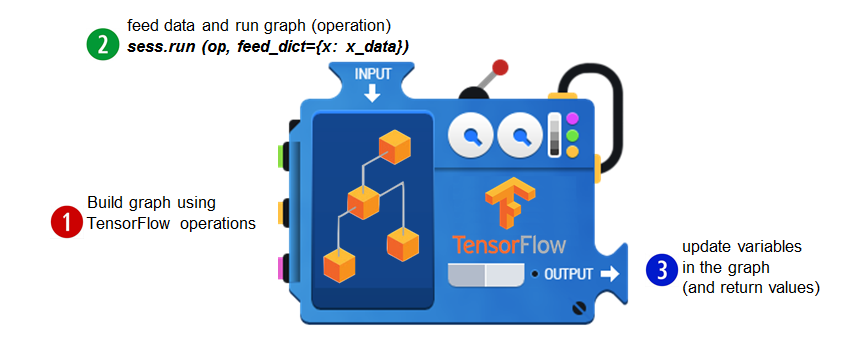

In [2]:
# TensorFlow Mechanics
bpc.Figure(bpc.ML02_IMG_01)

<hr>
### Ex1. Variable 사용
> $$H(x) = Wx+b$$
<br><br>
x, y 값이 주어졌을 때, W, b 값을 예측하기
<br>
1. 그래프 빌드
2. 세션을 통해 그래프를 실행
3. 실행결과가 그래프를 업데이트

<hr>
``` python
# tf.random_normal

Signature: tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
Docstring:
Outputs random values from a normal distribution.
```
<hr>

In [3]:
from tqdm import tqdm_notebook
import tensorflow as tf

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# TF 변수 선언 (1차원 랜던숫자)
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our hypothesis XW+b
hypothesis = x_train * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())


C:\Python\Anaconda3-50\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
# Fit the line
for step in tqdm_notebook(range(2001)):
    sess.run(train)
    if step % 200 == 0 or step < 5:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val},  \t W={W_val},  \t b={b_val}".format(
            step=step, 
            cost_val=sess.run(cost), 
            W_val=sess.run(W), 
            b_val=sess.run(b)
        ));


A Jupyter Widget

step=0, 	 cost=15.947647094726562,  	 W=[-0.10760389],  	 b=[-1.6744953]
step=1, 	 cost=12.634827613830566,  	 W=[0.06275228],  	 b=[-1.5967013]
step=2, 	 cost=10.016082763671875,  	 W=[0.21409678],  	 b=[-1.5272774]
step=3, 	 cost=7.94596529006958,  	 W=[0.34853885],  	 b=[-1.4652957]
step=4, 	 cost=6.30950927734375,  	 W=[0.4679537],  	 b=[-1.4099313]
step=200, 	 cost=0.054205965250730515,  	 W=[1.270408],  	 b=[-0.614701]
step=400, 	 cost=0.020698485895991325,  	 W=[1.1670957],  	 b=[-0.3798478]
step=600, 	 cost=0.007903694175183773,  	 W=[1.1032552],  	 b=[-0.23472299]
step=800, 	 cost=0.0030180178582668304,  	 W=[1.0638053],  	 b=[-0.1450444]
step=1000, 	 cost=0.001152425422333181,  	 W=[1.0394276],  	 b=[-0.08962875]
step=1200, 	 cost=0.00044004942174069583,  	 W=[1.0243639],  	 b=[-0.05538493]
step=1400, 	 cost=0.00016803272592369467,  	 W=[1.0150554],  	 b=[-0.03422454]
step=1600, 	 cost=6.41627048025839e-05,  	 W=[1.0093032],  	 b=[-0.0211485]
step=1800, 	 cost=2.4500424842699

<hr>
### Ex2. Plaeholder 사용
> 데이터의 형태만 지정하고 실제 데이터는 실행단계에서 입력받는 방법
<br>
1. 그래프 빌드
2. 세션을 통해 그래프를 실행
3. 실행결과가 그래프를 업데이트

In [5]:
import tensorflow as tf

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())


In [6]:
# Fit the line
steps     = []
cost_vals = []
W_vals    = []
b_vals    = []
for step in tqdm_notebook(range(2001)):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                                         feed_dict={X: [1, 2, 3], 
                                                    Y: [1, 2, 3]})
    steps.append(step)
    cost_vals.append(cost_val)
    W_vals.append(W_val)
    b_vals.append(b_val)
    # W_vals.append(float(W_val))
    # b_vals.append(float(b_val))
    
    if step % 200 == 0 or step < 5:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val}, \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));

A Jupyter Widget

step=0, 	 cost=18.289445877075195, 	 W=[2.8973], 	 b=[-0.31831723]
step=1, 	 cost=14.484374046325684, 	 W=[2.7329514], 	 b=[-0.3878429]
step=2, 	 cost=11.476532936096191, 	 W=[2.586723], 	 b=[-0.4494041]
step=3, 	 cost=9.098864555358887, 	 W=[2.4566052], 	 b=[-0.5038849]
step=4, 	 cost=7.219316005706787, 	 W=[2.3408108], 	 b=[-0.55207145]
step=200, 	 cost=0.05136444792151451, 	 W=[1.2625923], 	 b=[-0.596934]
step=400, 	 cost=0.019613439217209816, 	 W=[1.162266], 	 b=[-0.3688689]
step=600, 	 cost=0.007489396259188652, 	 W=[1.1002706], 	 b=[-0.22793879]
step=800, 	 cost=0.002859821543097496, 	 W=[1.0619612], 	 b=[-0.1408524]
step=1000, 	 cost=0.0010920175118371844, 	 W=[1.0382881], 	 b=[-0.08703817]
step=1200, 	 cost=0.0004169853636994958, 	 W=[1.02366], 	 b=[-0.05378436]
step=1400, 	 cost=0.0001592256739968434, 	 W=[1.0146203], 	 b=[-0.03323551]
step=1600, 	 cost=6.080007369746454e-05, 	 W=[1.0090344], 	 b=[-0.02053742]
step=1800, 	 cost=2.3216998670250177e-05, 	 W=[1.0055828], 	 b=[-0.

In [7]:
W_val, W_val[0], type(W_val[0])

(array([1.0034499], dtype=float32), 1.0034499, numpy.float32)

In [8]:
# cost_vals, b_val
type(b_val), str(b_val), float(b_val)

(numpy.ndarray, '[-0.00784239]', -0.00784238614141941)

<hr>
### Ex3. Plaeholder 사용
>  exptected : W=1, b=1.1
- X: [1.0, 2.0, 3.0, 4.0, 5.0]
- Y: [2.1, 3.1, 4.1, 5.1, 6.1]

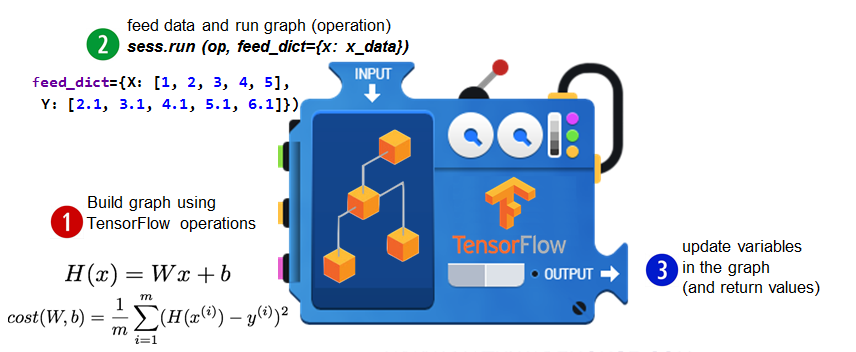

In [9]:
# TensorFlow Mechanism for placeholder
bpc.Figure(bpc.ML02_IMG_02)

In [10]:
# Fit the line
# for step in notebook_tqdm(range(2001)):
for step in range(2001):

    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
        feed_dict={X: [1.0, 2.0, 3.0, 4.0, 5.0], 
                   Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 100 == 0 or step < 10:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val},  \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));
        

step=0, 	 cost=1.2045137882232666, 	 W=[1.0691615],  	 b=[0.01410747]
step=1, 	 cost=0.7811670899391174, 	 W=[1.1190995],  	 b=[0.03167562]
step=2, 	 cost=0.5339270234107971, 	 W=[1.1569971],  	 b=[0.04589614]
step=3, 	 cost=0.3893164396286011, 	 W=[1.185704],  	 b=[0.05755839]
step=4, 	 cost=0.3045167028903961, 	 W=[1.2073956],  	 b=[0.06726497]
step=5, 	 cost=0.2545756697654724, 	 W=[1.2237326],  	 b=[0.07547594]
step=6, 	 cost=0.22495190799236298, 	 W=[1.2359829],  	 b=[0.08254246]
step=7, 	 cost=0.20717152953147888, 	 W=[1.2451141],  	 b=[0.08873263]
step=8, 	 cost=0.19629646837711334, 	 W=[1.251865],  	 b=[0.09425113]
step=9, 	 cost=0.18944880366325378, 	 W=[1.2567997],  	 b=[0.0992542]
step=100, 	 cost=0.09805016219615936, 	 W=[1.2026056],  	 b=[0.3685296]
step=200, 	 cost=0.04980628937482834, 	 W=[1.1444007],  	 b=[0.57866764]
step=300, 	 cost=0.02529991790652275, 	 W=[1.1029168],  	 b=[0.72843707]
step=400, 	 cost=0.012851549312472343, 	 W=[1.0733508],  	 b=[0.8351803]
step=500

<hr>
### Ex4. Linear Regression

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

number_of_points = 200
x_point = []
y_point = []

w = 0.25
b = 0.75

for i in range(number_of_points):
    x = np.random.normal(0.0, 0.5)
    y = w*x + b +np.random.normal(0.0, 0.1)
    x_point.append([x])
    y_point.append([y])

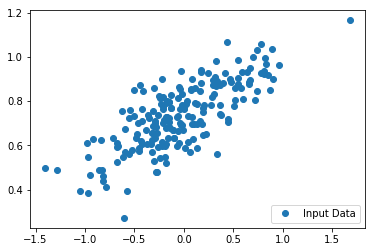

In [12]:
plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend(loc=4)
plt.show()

In [13]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
B = tf.Variable(tf.zeros([1]))
y = W * x_point + B

# Computes the mean of elements across dimensions of a tensor
cost_function = tf.reduce_mean(tf.square(y - y_point))

# Optimizer that implements the gradient descent algorithm
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

# Add operations to minimize cost_function
train = optimizer.minimize(cost_function)

# Returns an Op that initializes global variables
# model = tf.initialize_all_variables()
model = tf.global_variables_initializer()



 y = [-0.41924667] x + [0.70906013] 


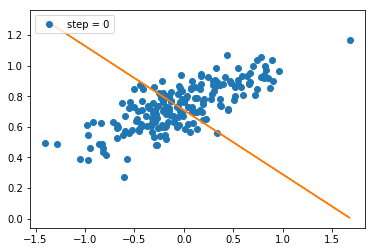


 y = [-0.2683179] x + [0.71600574] 


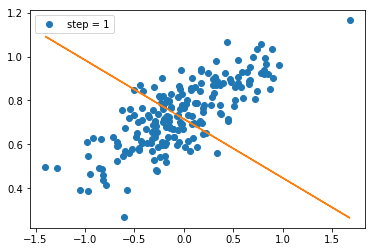


 y = [-0.15212984] x + [0.72275716] 


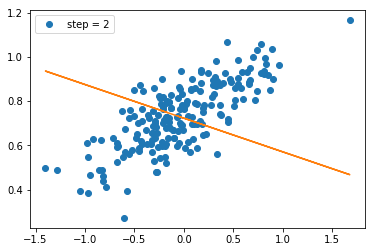


 y = [-0.06262304] x + [0.7279545] 


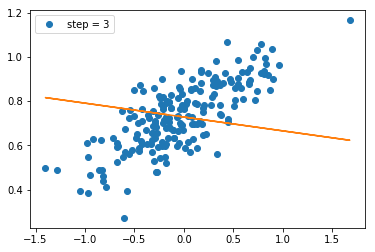


 y = [0.00632938] x + [0.7319583] 


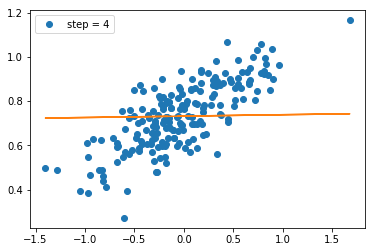


 y = [0.23763947] x + [0.7453898] 


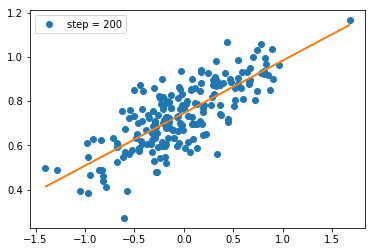


 y = [0.23763947] x + [0.7453898] 


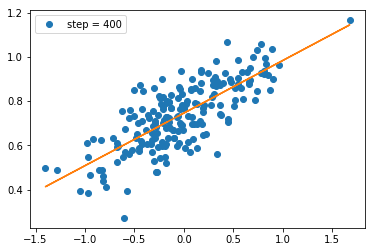


 y = [0.23763947] x + [0.7453898] 


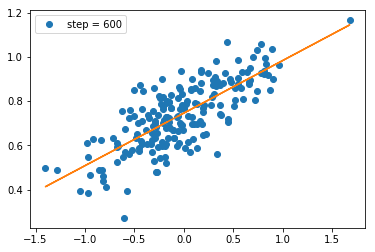


 y = [0.23763947] x + [0.7453898] 


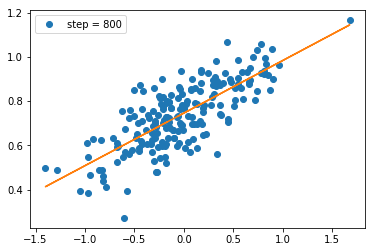


 y = [0.23763947] x + [0.7453898] 


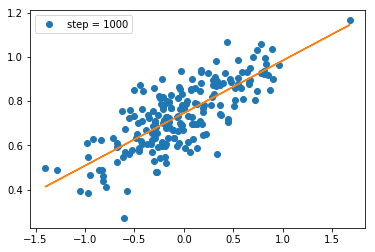


 y = [0.23763947] x + [0.7453898] 


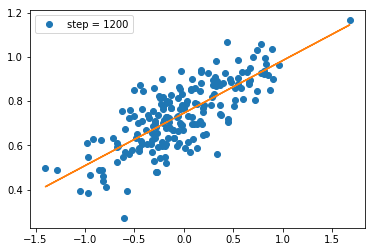


 y = [0.23763947] x + [0.7453898] 


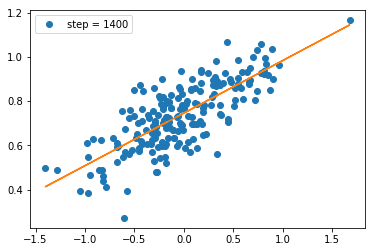


 y = [0.23763947] x + [0.7453898] 


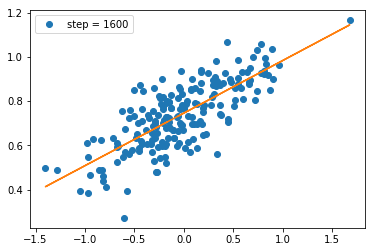


 y = [0.23763947] x + [0.7453898] 


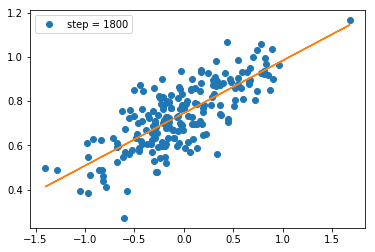


 y = [0.23763947] x + [0.7453898] 


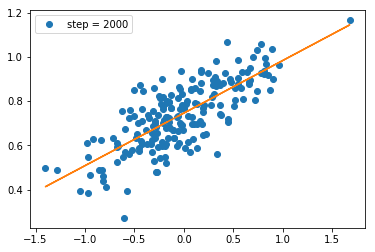

In [14]:
with tf.Session() as sess:
    sess.run(model)
    for step in range(0,2001):
        sess.run(train)
        if (step % 200) == 0 or step<5:
            print("\n y = {w} x + {b} ".format(w=sess.run(W), b=sess.run(B)))
            plt.plot(x_point,y_point,'o',label='step = {}'.format(step))
            plt.plot(x_point,sess.run(W)*x_point+sess.run(B))
            plt.legend(loc=2)
            plt.show()

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>